## Machine learning (Chapter 1)

- training set = a set of what a system "learns" 
- training instance = An element in training set 
- Performance metric, P is determined naturally by a research question and domain --> Also called Accuracy

### Why Machine Learning? 
- Data Mining helps me to find unexpected trend/pattern in big data 

#### Selected Application in Various Fields and the techniques of Machine Learning 
1. Classify images of items in production lines - CNN (Image Classification) 
2. Diagnose brain cancer in MRI - CNN (Semantic segmantation) 
3. Summarize long paragraphs - NLP
4. Forecasting revenues for next year, based on many performance metrics - Regression
5. Representing a complex, high-dimensional dataset in a clear and insightful diagram  - Data vis (dimensionality reduction)- Very helpful in biomedical data science

### Types of Machine Learning 
> (1) Supervised 
- Training data is labeled 
- Classification and Regression are such typical problems
- Pre-defined features (i.e. gas mileage, car age, and brand) become predictor variable to predict target (i.e. price)
- Machine Learning Algorithms are as followed: 
    1. k-nearest neighbors (KNN) 
    2. Linear regression 
    3. Logistic regression 
    4. Support Vector Machine 
    5. Decision Tree and Random forest 
    6. Neural network 
> (2) Unsupervised 
- Without label, and just values. 
- Refer to Chapter 8 and 9 (links to be added)
- **데이터의 차원을 먼저 줄이고 ML 알고리즘을 이용하는데 유용할 수 있다.**
<br> 
- Purposes of machine learning Algorithms are as followed: 
1. Clustering 
    - k-means 
    - DBSCAN 
    - Hierarchical cluster analysis (HCA) 
    - Outlier Detection or novelty detection 
    - One-class SVM 
    - Isolation Forest 
2. Visualization and Dimensionality Reduction 
    - Principal Component Analysis (PCA) 
    - Kernel PCA 
    - Locally-linear Embedding (LLE) 
    - t-distriuted Stochastic Neighbor Embedding 
3. Association Rule Learning 
    - Apriori
    - Eclat 

> (3) Semi-Supervised 
- where labeled data are scarce 
- i.e. Automatic tagging on Google photo system 
<br> 
- Deep Belief Network (DBN) is based on N-layerd restricted Boltzmann machine (RBM) 

> (4) Reinforcement Learning
<br> 
- Reward OR penalty after an action

## Learning Processes 

**Learning rate** <br>
**Computing Resource**
1. Online OR incremental learning 
2. Batch learning 


In [3]:
## Required packages to be loaded 
import sys
import sklearn
import os # File system navigation 
datapath = os.path.join("datasets", "lifesat", "")
print(datapath)

datasets/lifesat/


In [4]:
# Jupyter graph setting
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [12]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value") # Pivot on the counts of country, creating indicator columns
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [33]:
oecd_bli["INEQUALITY"].unique() # There are 5 instances, what are the meanings? 
len(oecd_bli['Country']) == len(oecd_bli['Country'].unique()) # countries are appearning many times

False

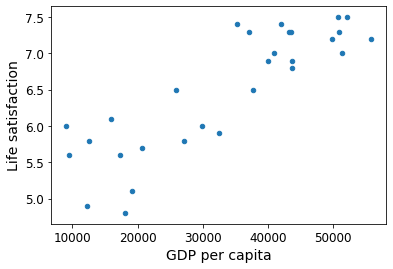

[[5.96242338]]


In [34]:
# Required packages 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Loading data 
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Preprocessing data 
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]] # About https://numpy.org/doc/stable/reference/generated/numpy.c_.html
y = np.c_[country_stats["Life satisfaction"]]

# Data vis.
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# linear model
model = sklearn.linear_model.LinearRegression()

# Model tranining 
model.fit(X, y)

# 키프로스에 대한 예측
X_new = [[22587]]  # 키프로스 1인당 GDP
print(model.predict(X_new)) # 출력 [[ 5.96242338]]

In [35]:
np.random.seed(42)

In [36]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [41]:
gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True) # Renaming 2015 with GDP per capita 
gdp_per_capita.set_index("Country", inplace=True) # Get rid of automatic indexing 
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [44]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

In [43]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [45]:
## Setting aside the test data 
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

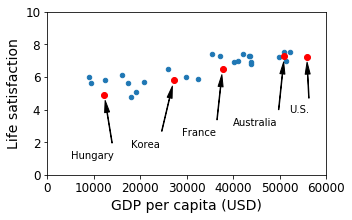

In [47]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
plt.xlabel("GDP per capita (USD)")
#save_fig('money_happy_scatterplot')
plt.show()

In [49]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv")) # Saving dataframe to csv

In [50]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.894,4.9
Korea,27195.197,5.8
France,37675.006,6.5
Australia,50961.865,7.3
United States,55805.204,7.2


In [51]:
from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.853052800266436, 4.911544589158483e-05)

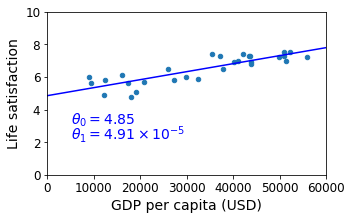

In [52]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.xlabel("GDP per capita (USD)")
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()